In [1]:
# Install all the necessary pacakges mentioned below using pip install <PACKAGE_NAME> from the command line
# Import all the necessary libraries
import sys
import numpy as np
import datetime as dt
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
from matplotlib.ticker import FuncFormatter

import seaborn as sns
sns.set(font_scale=1.5)

from IPython.display import display
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 200)

figw = 20
figh = 10
plt.rc('figure', figsize=(figw, figh))

# Create a variable with the directory path of dataset
datadir = 'C:/Users/Anil Joshi/Desktop/data-master/data-master/fandango/'

In [2]:
# Read the dataset
ratings = pd.read_csv(datadir+'fandango_score_comparison.csv')
ratings.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
# Analyzing the shape of the dataset
ratings.shape

(146, 22)

In [4]:
# looking at various columns present in the dataset
ratings.columns.values

array(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Fandango_votes', 'Fandango_Difference'], dtype=object)

# The 0 - 5 Point System:-

1 - 'Hated It'

2 - 'Disliked It'

3 - 'Liked It'

4 - 'Really Liked It'

5 - 'Loved It'



In [5]:
# We will only analyze user ratings from the other websites as we are looking at fan/user rating from Fandango.com

# All the ratings are normalized between 0 and 5

In [6]:
# Creating bins for all histogram so that the histogram is centered at the label

bins=np.arange(1,6,0.5)

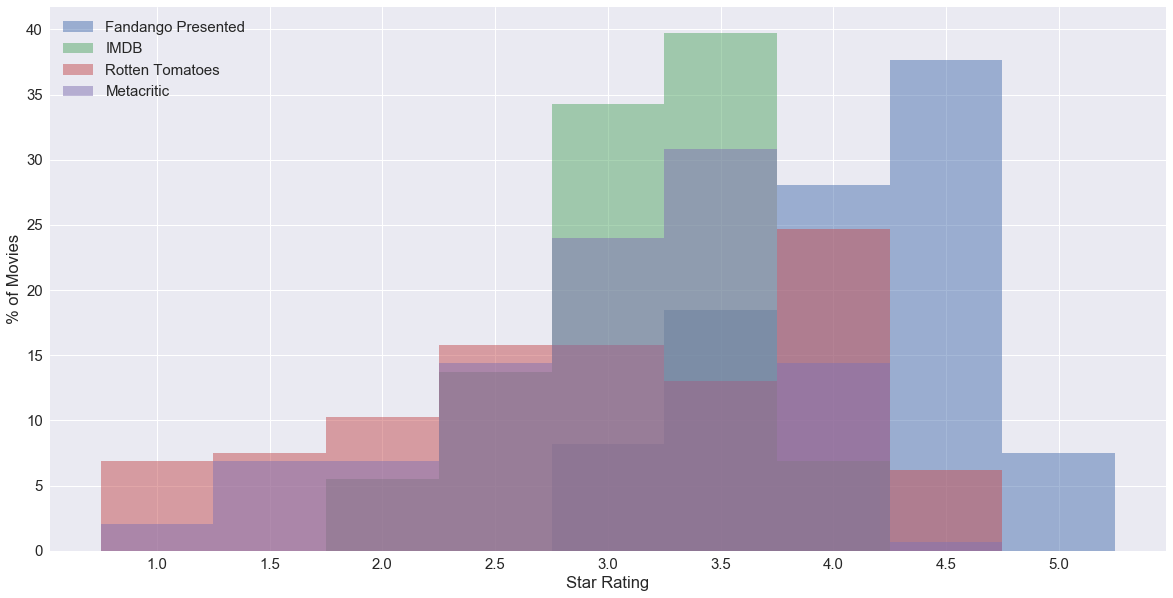

In [7]:
# Analyzing the difference in the distribution of Fandango presented star rating and all other normalized user ratings

fig, ax = plt.subplots()
ax.set_xticks(bins[:-1])
ax.hist(ratings.Fandango_Stars, alpha=0.5,label='Fandango Presented', align='left', bins=bins,weights = (np.ones_like(ratings.index) / len(ratings.index))*100)
ax.hist(ratings.IMDB_norm, alpha=0.5,label='IMDB', align='left', bins=bins,weights = (np.ones_like(ratings.index) / len(ratings.index))*100)
ax.hist(ratings.RT_user_norm, alpha=0.5,label='Rotten Tomatoes', align='left', bins=bins,weights = (np.ones_like(ratings.index) / len(ratings.index))*100)
ax.hist(ratings.Metacritic_user_nom, alpha=0.5,label='Metacritic', align='left', bins=bins,weights = (np.ones_like(ratings.index) / len(ratings.index))*100)
plt.xlabel("Star Rating")
plt.ylabel('% of Movies')
plt.legend()
plt.show()

In [8]:
# Getting counts for movies with 4 or greater star rating
ratings.loc[ratings.Fandango_Stars>=4.0].shape[0]

107

In [9]:
# 73.2% of the movies have a rating of 4 or higher on Fandango.com

In [10]:
# Checking min number of Fandango votes for which there is a Fandango rating 
ratings[ratings['Fandango_votes'] == min(ratings['Fandango_votes'])].Fandango_votes.values

array([35], dtype=int64)

In [11]:
# Lets analyze if this distribution varies with higher number of Fandango user reviews. 

# Considering movies with more than 1000 user reviews

ratings_high_votes=ratings[ratings['Fandango_votes'] >1000]

In [12]:
ratings_high_votes.shape

(83, 22)

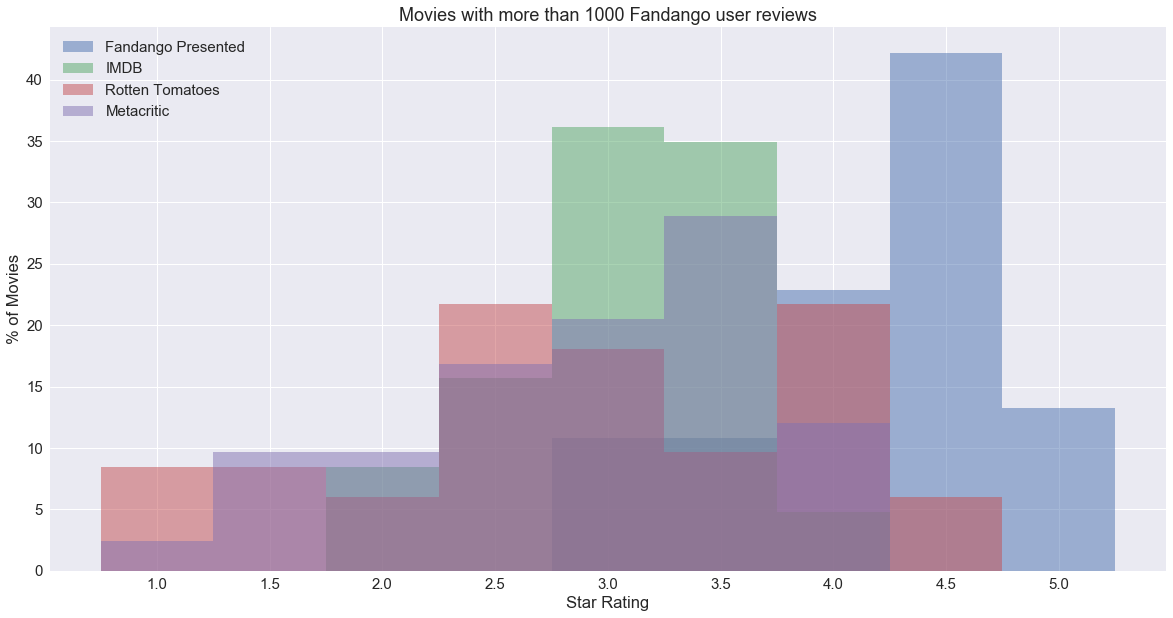

In [13]:
# Plotting the above dataset

fig, ax = plt.subplots()
bins=np.arange(1,6,0.5)
ax.set_xticks(bins[:-1])
ax.hist(ratings_high_votes.Fandango_Stars, alpha=0.5,label='Fandango Presented', align='left', bins=bins,weights = (np.ones_like(ratings_high_votes.index) / len(ratings_high_votes.index))*100)
ax.hist(ratings_high_votes.IMDB_norm, alpha=0.5,label='IMDB', align='left', bins=bins,weights = (np.ones_like(ratings_high_votes.index) / len(ratings_high_votes.index))*100)
ax.hist(ratings_high_votes.RT_user_norm, alpha=0.5,label='Rotten Tomatoes', align='left', bins=bins,weights = (np.ones_like(ratings_high_votes.index) / len(ratings_high_votes.index))*100)
ax.hist(ratings_high_votes.Metacritic_user_nom, alpha=0.5,label='Metacritic', align='left', bins=bins,weights = (np.ones_like(ratings_high_votes.index) / len(ratings_high_votes.index))*100)
plt.xlabel("Star Rating")
plt.ylabel('% of Movies')
plt.title("Movies with more than 1000 Fandango user reviews")
plt.legend()
plt.show()

In [14]:
# Getting counts for movies which have greater than 1000 Fandango user reviews and 4 or greater star rating
ratings_high_votes.loc[ratings_high_votes.Fandango_Stars>=4.0].shape[0]

65

In [15]:
# 78.31% of the movies which have more than 1000 user reviews have a rating of 4 or higher on Fandango.com

In [16]:
# Considering movies with less than 100 user reviews

ratings_low_votes=ratings[ratings['Fandango_votes'] <100]

In [17]:
ratings_low_votes.shape

(28, 22)

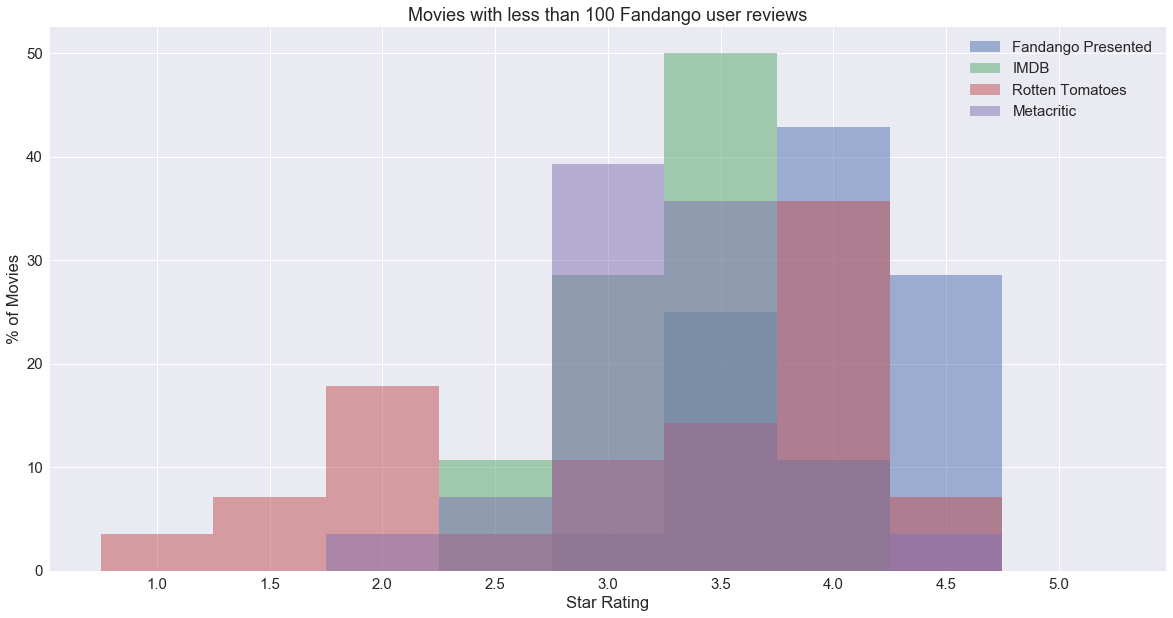

In [18]:
# Plotting the above dataset

fig, ax = plt.subplots()
bins=np.arange(1,6,0.5)
ax.set_xticks(bins[:-1])
ax.hist(ratings_low_votes.Fandango_Stars, alpha=0.5,label='Fandango Presented', align='left', bins=bins,weights = (np.ones_like(ratings_low_votes.index) / len(ratings_low_votes.index))*100)
ax.hist(ratings_low_votes.IMDB_norm, alpha=0.5,label='IMDB', align='left', bins=bins,weights = (np.ones_like(ratings_low_votes.index) / len(ratings_low_votes.index))*100)
ax.hist(ratings_low_votes.RT_user_norm, alpha=0.5,label='Rotten Tomatoes', align='left', bins=bins,weights = (np.ones_like(ratings_low_votes.index) / len(ratings_low_votes.index))*100)
ax.hist(ratings_low_votes.Metacritic_user_nom, alpha=0.5,label='Metacritic', align='left', bins=bins,weights = (np.ones_like(ratings_low_votes.index) / len(ratings_low_votes.index))*100)
plt.xlabel("Star Rating")
plt.ylabel('% of Movies')
plt.title("Movies with less than 100 Fandango user reviews")
plt.legend()
plt.show()

In [19]:
# Getting counts for movies which have less than 100 Fandango user reviews and 4 or greater star rating
ratings_low_votes.loc[ratings_low_votes.Fandango_Stars>=4.0].shape[0]

20

In [20]:
# 71.14% of the movies which have less than 100 user reviews have a rating of 4 or higher on Fandango.com

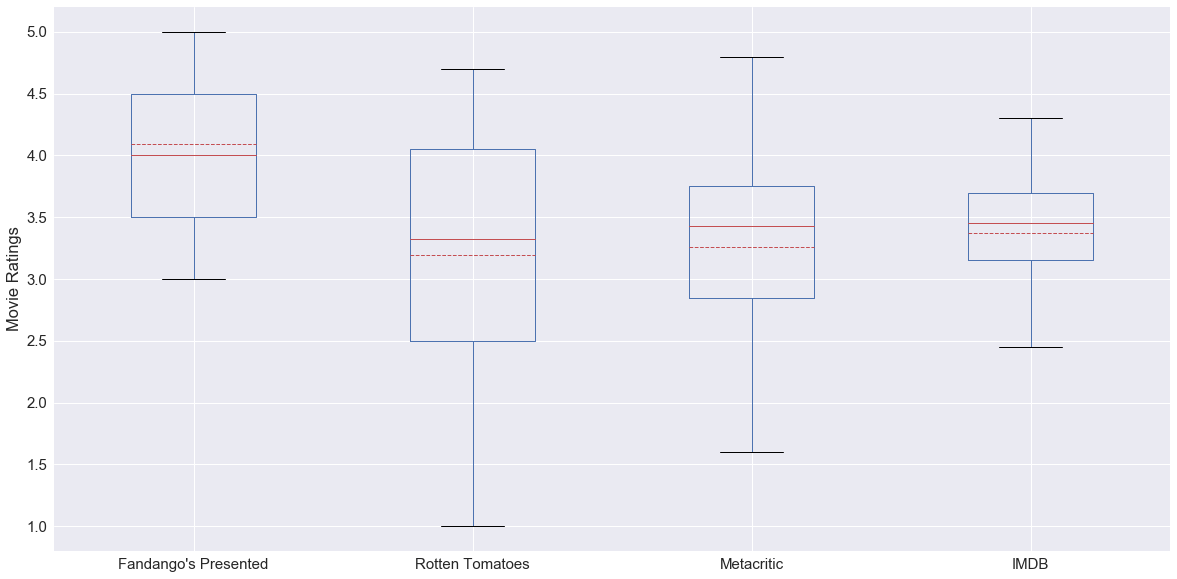

In [21]:
# Let's analyze the user ratings for different review website using a box plot

websites = ['Fandango_Stars','RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm']

ratings[websites].boxplot(meanline=True, showmeans= True)
plt.xticks([1,2,3,4],["Fandango's Presented",'Rotten Tomatoes', 'Metacritic', 'IMDB'])
plt.ylabel("Movie Ratings")
plt.show()

# From the analysis, we can assume that there is something suspicious with the ratings of the movies presented on the web page of Fandango.com as even after considering two different cases i.e. movies with large number of user reviews and the movies with low number of user reviews(probably bad movies), percentage of movies that have presented rating more than or equal to 4 is around 70%. This is very different from the distribution of ratings on other review websites like IMDB, Metacritic and Rotten Tomatoes which seem to be in the same ballpark.

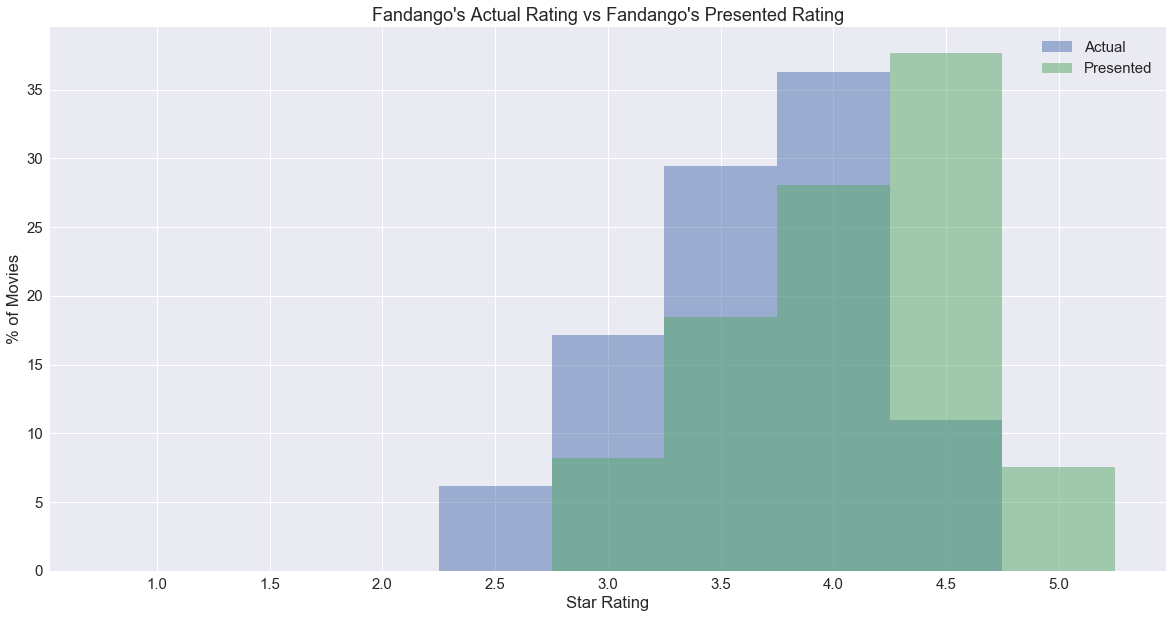

In [22]:
# Analyzing the difference in the distribution of Fandango actual rating value and all other normalized ratings

fig, ax = plt.subplots()
bins=np.arange(1,6,0.5)
ax.set_xticks(bins[:-1])
ax.hist(ratings.Fandango_Ratingvalue, alpha=0.5,label='Actual', align='left', bins=bins,weights = (np.ones_like(ratings.index) / len(ratings.index))*100)
ax.hist(ratings.Fandango_Stars, alpha=0.5,label='Presented',align='left', bins=bins,weights = (np.ones_like(ratings.index) / len(ratings.index))*100)
plt.xlabel("Star Rating")
plt.ylabel('% of Movies')
plt.title("Fandango's Actual Rating vs Fandango's Presented Rating")
plt.legend()
plt.show()

In [23]:
# Let's analyze the difference between Fandango's Actual and Presented Ratings via box plot to make it more clear

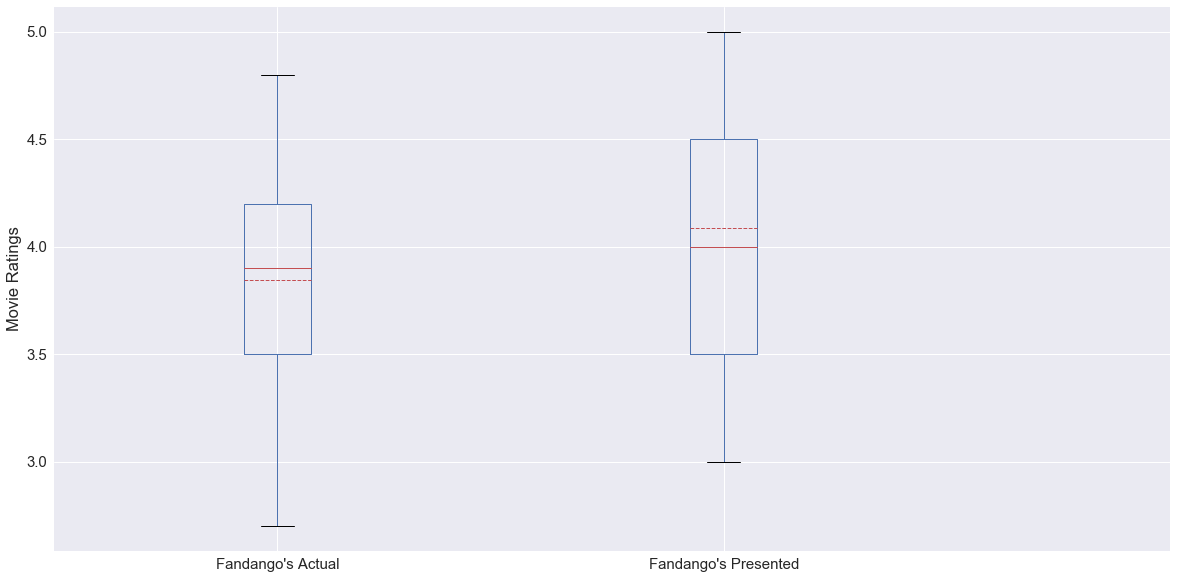

In [24]:
fandango_ratings = ['Fandango_Ratingvalue','Fandango_Stars']

ratings[fandango_ratings].boxplot(meanline=True, showmeans= True)
plt.xticks([1,2,3],["Fandango's Actual","Fandango's Presented"])
plt.ylabel("Movie Ratings")
plt.show()

In [25]:
# Let's look at the distribution of the difference between Fandango's Actual and Presented Ratings

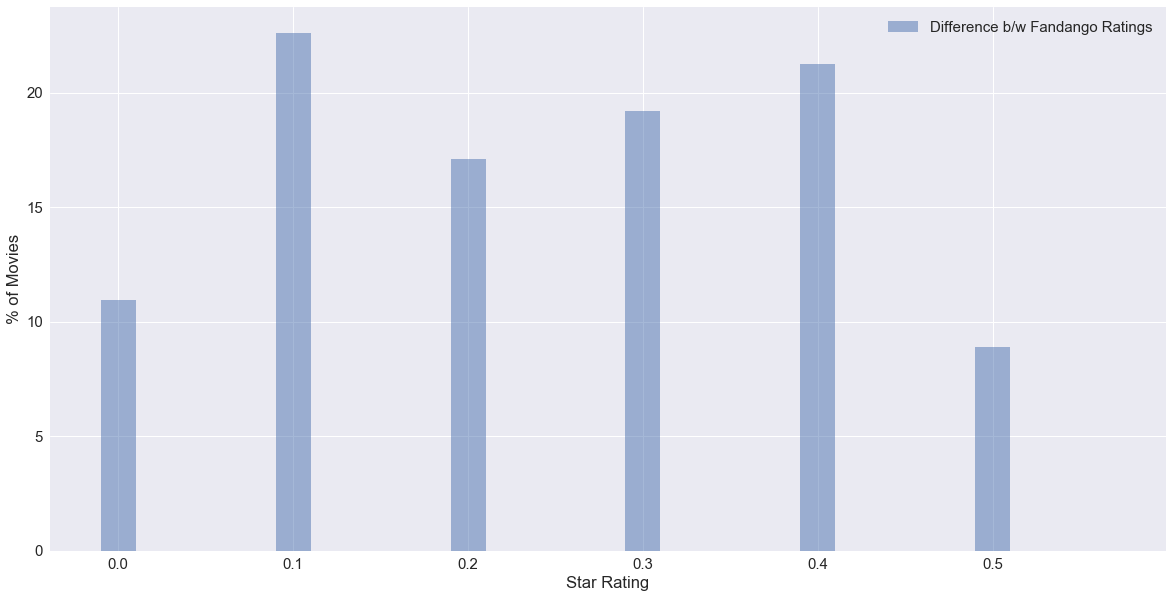

In [26]:
# Plotting the distribution of differences

fig, ax = plt.subplots()

# Creating bins for all histogram so that the histogram is centered at the label
bins=np.arange(0.0,0.6,0.02)
ax.hist(ratings.Fandango_Difference, align='left',alpha=0.5, label="Difference b/w Fandango Ratings", bins=bins, weights = (np.ones_like(ratings.index) / len(ratings.index))*100)
plt.xlabel("Star Rating")
plt.ylabel('% of Movies')
plt.legend()
plt.show()

In [27]:
# Counting all the movies where a movie was not rounded off to the nearest star but rather the next highest half star
ratings.loc[ratings.Fandango_Difference>=0.3].shape[0]

72

In [28]:
# Let's check how Fandango's Actual user ratings compare to the Presented rating and ratings from the other websites

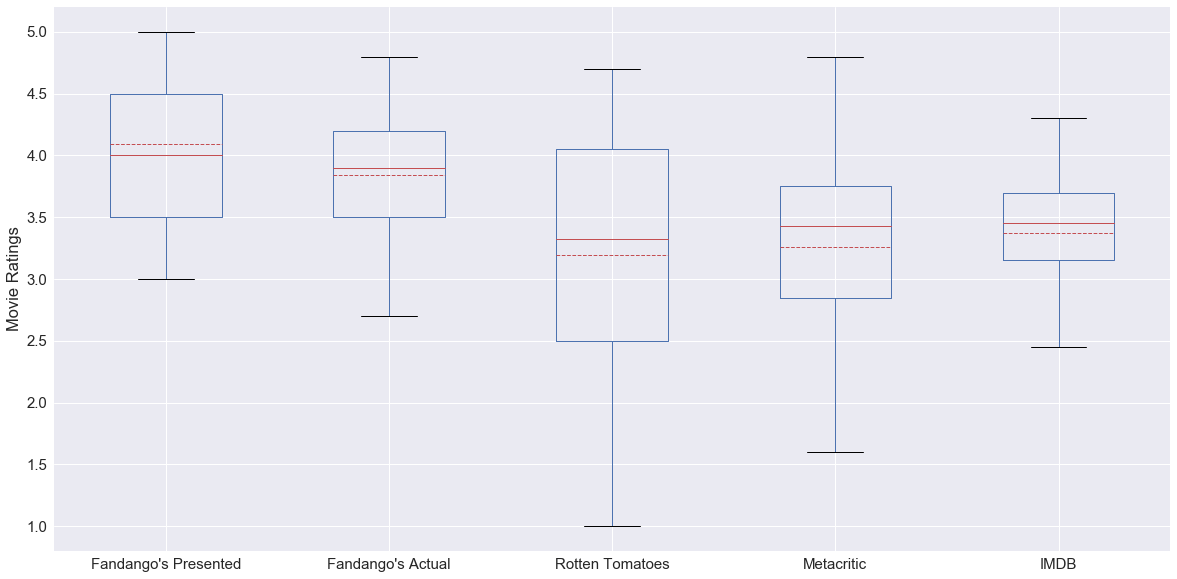

In [29]:
websites_box_comp = ['Fandango_Stars','Fandango_Ratingvalue','RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm']

ratings[websites_box_comp].boxplot(meanline=True, showmeans= True)
plt.xticks([1,2,3,4,5],["Fandango's Presented","Fandango's Actual",'Rotten Tomatoes', 'Metacritic', 'IMDB'])
plt.ylabel("Movie Ratings")
plt.show()

# From the above analysis, we can infer that Fandango's Actual Ratings are comparatively lower than the Presented ratings but they are still on the higher side and biased towards the higher ratings(overrates due to improper rounding) when compared to the aggregated user ratings from the other websites.

In [30]:
# In order to analyze the relationship between all the user ratings, we can create a correlation matrix

In [31]:
# calculate the correlation matrix for different user ratings using Pearson Correlation method
websites_corr = ['Fandango_Stars','Fandango_Ratingvalue','RT_user_norm', 'Metacritic_user_nom','IMDB_norm']
corr = ratings[websites_corr].corr(method='pearson')

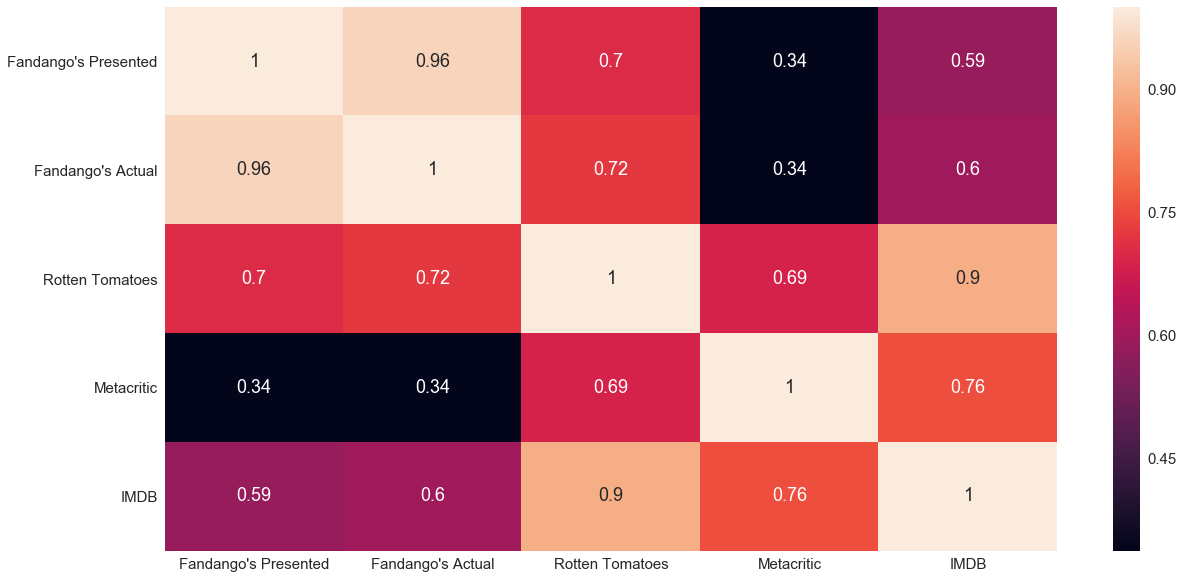

In [32]:
# plot heatmap for the correlation matrix using seaborn module
sns.heatmap(corr, annot=True,
        xticklabels=["Fandango's Presented","Fandango's Actual",'Rotten Tomatoes', 'Metacritic','IMDB'],
        yticklabels=["Fandango's Presented","Fandango's Actual",'Rotten Tomatoes', 'Metacritic','IMDB'])
plt.show()

# An interesting insight from this matrix is that the user ratings from Fandango seem to depict a moderate to strong positive relationship with Rotten Tomatoes and IMDB but a weak relationship with Metacritic which could be possibly due to a very different aggregation technique followed by Metacritic for the user ratings